In [86]:
#############################################
########### From Manuscript XXX #############
#############################################

In [111]:
### Code to fit DRS spectra ### 2022-06-97 ## case system 0M EC:EMC 3:7 and 1 M LiPF6 EC:EMC 3:7
## STANDARD IMPORTS
import numpy as np, matplotlib.pyplot as plt
from scipy import stats
import pandas as pd, csv
from matplotlib import colors as col
from scipy import integrate
import scipy.fftpack, statsmodels.tsa.stattools
from scipy.optimize import curve_fit, fsolve
# Where am I?
!pwd
!ls
plt.rc('font', size=16)          # controls default text sizes
%precision 3

/Users/jself/Desktop/WORKING/DRS-GEN2/Data/2022-06-17
1M LiPF6.xlsx
DRSDiptich-2022-07-23.pdf
DRSDiptich.pptx
EC-EMC 3-7.xlsx
Error0M-2022-07-23.pdf
Error1M-2022-07-23.pdf
GEN2-2022-06-17-Copy1.ipynb
GEN2-2022-07-21-Backup.ipynb
GEN2-2022-07-21-DRS-1MLiPF6inECEMC-ForGithub.ipynb
GEN2-2022-07-21-Just-1M.ipynb
GEN2-2022-07-24.ipynb
GEN2-DRS.xlsx
Neat-2022-07-23.png
Untitled.ipynb
WithSalt-04-04.png
WithSalt-2022-07-23.png
~$GEN2-DRS.xlsx


'%.3f'

In [112]:
#### 1.1   1 M elyte with constraints, fit eps' first ### 
#########################################################
#### 1.1.1 1 M defining functions ###############
#### 1.1.2 1 M Fitting eps' first ############### 18.452299839829468
#### 1.1.3 checking against eps'' and cond ########
#### 1.1.4 plotting diff ##########################

In [113]:
####################################
#### 0.1 Importing Files ###########
####################################
##### loading files
df = pd.read_excel(r'GEN2-DRS.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'
xls = pd.ExcelFile(r'GEN2-DRS.xlsx')
print(xls.sheet_names)
dfGEN2_0M = pd.read_excel(r'GEN2-DRS.xlsx', sheet_name='EC-EMC-3-7')
dfGEN2_1M = pd.read_excel(r'GEN2-DRS.xlsx', sheet_name='1M-LiPF6')
#
x1=np.linspace(0.01,300,40000)
#### loading files
ftempExp=dfGEN2_1M.values[0:,0]/(10**9)
EpsPrimeExp1=dfGEN2_1M.values[0:,1]
EpsPrimePrimeExp1=dfGEN2_1M.values[0:,2]
EpsPrimeExp2=dfGEN2_1M.values[0:,3]
EpsPrimePrimeExp2=dfGEN2_1M.values[0:,4]
EpsPrimeExpAv=dfGEN2_1M.values[0:,5]
EpsPrimePrimeExpAv=dfGEN2_1M.values[0:,6]
##### user modification
lbf=0
ubf=100
print("lower freq cutoff, upperfreq cuttof",ftempExp[lbf],ftempExp[ubf])
ftempExp=ftempExp[lbf:ubf]
EpsPrimeExpAv=EpsPrimeExpAv[lbf:ubf]
EpsPrimePrimeExpAv=EpsPrimePrimeExpAv[lbf:ubf]
#EpsPrimeExpAv=EpsPrimeExp2
#EpsPrimePrimeAv=EpsPrimePrimeExp2

['EC-EMC-3-7', '1M-LiPF6', 'Sheet2']
lower freq cutoff, upperfreq cuttof 0.5 26.5


In [114]:
####### 1.1 ###################
#### FIT EPS' FOR EPS'(0) ###########
####### WITH CONSTRAINT #########
######## Amplitude EMC < 1 ######
#################################
# 1) First fit eps'
# 2) Then fit conductivity using same parameters for eps '' 

In [109]:
#####################################
###### 1.1.1 defining functions #####
#####################################
def DebyeRe(f,f0,strength):
    a=strength/(1+(f/f0)**2)
    return(a)
def DebyeIm(f,f0,strength):
    a=strength*(f/f0)/(1+(f/f0)**2)
    return(a)
def epsprimeprime(f,epssolute,epssolvent,epssolvent2,f1,f2,f3):
    a=DebyeIm(f,f1,epssolute)+DebyeIm(f,f2,epssolvent)+DebyeIm(f,f3,epssolvent2)
    return(a)
def epsprime(f,epssolute,epssolvent,epssolvent2,f1,f2,f3,shift):
    a=DebyeRe(f,f1,epssolute)+DebyeRe(f,f2,epssolvent)+DebyeRe(f,f3,epssolvent2)+shift
    return(a)
def epsppCond(f,epssolute,epssolvent,epssolvent2,f1,f2,f3,cond): #use column 6
    a=DebyeIm(f,f1,epssolute)+DebyeIm(f,f2,epssolvent)+DebyeIm(f,f3,epssolvent2)+1.798*cond/f
    return(a)

Total Permittivity 18.4523
Total Permittivity error estimate 0.4911
EC 5.257, 3.915 GHz Amplitude,Freq
EC error 0.202, 0.245 GHz A,F
EMC 1.000,17.675 GHz A,F
EMC error 0.163, 8.291 GHz A,F
SALT 7.994, 0.553 GHz A,F
SALT error 0.331,0.037 GHz A,F
Epsilon Inf 4.201
Epsilon Inf error 0.253


((0.010, 100),
 (0.010, 20.000),
 Text(0, 0.5, "$\\epsilon$' "),
 Text(0.5, 0, 'freq (GHz)'))

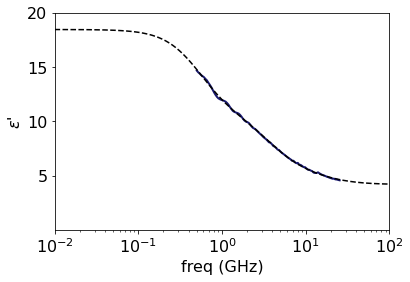

In [110]:
################################################
####### 1.1.2 Fitting eps' first ###############
################################################
################ user inputs ###########
la1,la2,la3,lf1,lf2,lf3,lshift=2, 0, 2, 3, 10, 0.3, 2 # lowerbounds
ua1,ua2,ua3,uf1,uf2,uf3,ushift=6, 1, 9, 7, 20, 1.5, 5 # upperbounds on fitting
############### fitting #####################
popt, pcov = curve_fit(epsprime, ftempExp[:], EpsPrimeExpAv[:], bounds=([la1, la2, la3, lf1, lf2, lf3, lshift], [ua1, ua2, ua3, uf1, uf2, uf3, ushift]), method='trf')
############## printing params and errors #############
perr = np.sqrt(np.diag(pcov))
#print(popt)
print("Total Permittivity %.4f" % (popt[0]+popt[1]+popt[2]+popt[6]))
print("Total Permittivity error estimate %.4f" % (np.sqrt(perr[0]**2+perr[1]**2+perr[2]**2+perr[6]**2)))
print("EC %.3f, %.3f GHz Amplitude,Freq" % (popt[0],popt[3]))
print("EC error %.3f, %.3f GHz A,F" % (perr[0],perr[3]))
print("EMC %.3f,%.3f GHz A,F" % (popt[1],popt[4]) )
print("EMC error %.3f, %.3f GHz A,F" % (perr[1],perr[4]))
print("SALT %.3f, %.3f GHz A,F" % (popt[2],popt[5]))
print("SALT error %.3f,%.3f GHz A,F" % (perr[2],perr[5]))
print("Epsilon Inf %.3f" % popt[6])
print("Epsilon Inf error %.3f" % perr[6])
################ ploting ###################
plt.semilogx(ftempExp[0:100],EpsPrimeExpAv[0:100],color='midnightblue',linewidth='2')
plt.semilogx(x1,epsprime(x1,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]),'--',color='black',label='$\epsilon\'$ Fit')
plt.xlim([0.01,100]),plt.ylim([0.01,20]),plt.ylabel('$\epsilon$\' '),plt.xlabel('freq (GHz)')

frequency lowest  value cutoff 0.9819670204487
conductivity 7.740299291557943


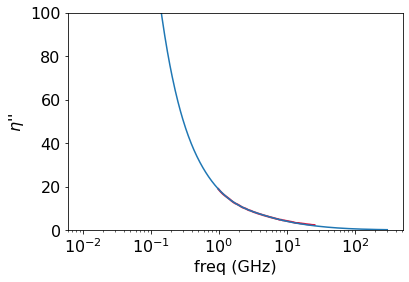

Total Permittivity 18.4523
Total Permittivity error estimate 0.4911
EC 5.257, 3.915 GHz Amplitude,Freq
EC error 0.202, 0.245 GHz A,F
EMC 1.000,17.675 GHz A,F
EMC error 0.163, 8.291 GHz A,F
SALT 7.994, 0.553 GHz A,F
SALT error 0.331,0.037 GHz A,F
Epsilon Inf 4.201
Epsilon Inf error 0.2533287972212051
Cond 7.740
Cond error 0.0004032487


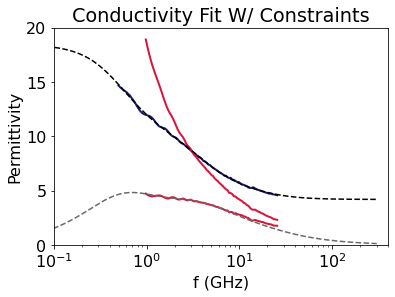

In [83]:
####################################################################
######## 1.1.3 checking params from eps' against eps'' and cond ####
####################################################################
##### we already have eps_total: now we use params to check ########
#### i) does eps'' look good and ii) what is conductivity? #########
####################################################################
cutoff=17
print("frequency lowest  value cutoff",ftempExp[cutoff]) # ad hoc cutoff at this freq
####################################################################
def epsppCONDwparams(x,COND):
    return(epsppCond(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],COND))
################ fitting conductivity #####################################
poptCOND, pcovCOND = curve_fit(epsppCONDwparams, ftempExp[cutoff:100], EpsPrimePrimeExpAv[cutoff:100], bounds=([0], [10]))
print("conductivity",poptCOND[0])
####### plotting total reflectance (eps'' without conductivity subtracted) ###
plt.semilogx(ftempExp[cutoff:],EpsPrimePrimeExpAv[cutoff:],color='crimson',linewidth='2')
plt.plot(x1,epsppCond(x1,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],poptCOND[0]))
plt.ylim([0,100]),plt.ylabel('$\eta$\'\' '),plt.xlabel('freq (GHz)'),plt.show()
####### plotting dielectric spectra, eps'' with conductivity subtracted ######################
plt.figure(2)
ToSubtract=1.798*poptCOND[0]/(ftempExp[cutoff:])
plt.semilogx(ftempExp,EpsPrimeExpAv,color='midnightblue',linewidth='2')
plt.semilogx(ftempExp[cutoff:],EpsPrimePrimeExpAv[cutoff:],color='crimson',linewidth='2')
plt.semilogx(ftempExp[cutoff:],EpsPrimePrimeExpAv[cutoff:]-ToSubtract,color='crimson',linewidth='2')
plt.semilogx(x1,epsprime(x1,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6]),'--',color='black',label='$\epsilon \'$ Fit')
plt.semilogx(x1,epsprimeprime(x1,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),'--',color='dimgrey',label='$\epsilon \'$ Fit')
plt.ylabel('Permittivity'),plt.xlabel('f (GHz)'),plt.xlim(0.1,400),plt.ylim(0,20),plt.title('Conductivity Fit W/ Constraints')
####### printing params ########
#perr = np.sqrt(np.diag(pcov))
print("Total Permittivity %.4f" % (popt[0]+popt[1]+popt[2]+popt[6]))
print("Total Permittivity error estimate %.4f" % (np.sqrt(perr[0]**2+perr[1]**2+perr[2]**2+perr[6]**2)))
print("EC %.3f, %.3f GHz Amplitude,Freq" % (popt[0],popt[3]))
print("EC error %.3f, %.3f GHz A,F" % (perr[0],perr[3]))
print("EMC %.3f,%.3f GHz A,F" % (popt[1],popt[4]) )
print("EMC error %.3f, %.3f GHz A,F" % (perr[1],perr[4]))
print("SALT %.3f, %.3f GHz A,F" % (popt[2],popt[5]))
print("SALT error %.3f,%.3f GHz A,F" % (perr[2],perr[5]))
print("Epsilon Inf %.3f" % popt[6])
print("Epsilon Inf error",perr[6])
#
print("Cond %.3f" % poptCOND[0])
print("Cond error %.10f" % pcovCOND[0])
#print("error epsINF",np.diag(pcovSHIFT))

(Text(0, 0.5, 'Fit error'),
 Text(0.5, 0, 'Frequency / GHz'),
 (1.000, 25),
 (-0.400, 0.400))

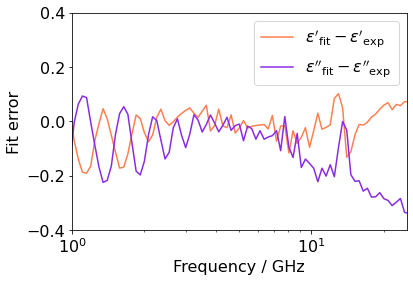

In [84]:
###############################################################################
############## 1.1.4 difference between fit and experimental #####################
###############################################################################
### user inputs #######
ftempExp=dfGEN2_1M.values[0:,0]/(10**9)
ytempExp=EpsPrimeExp2
ytempFit=epsprime(ftempExp,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6])
#
plt.semilogx(ftempExp,ytempFit-ytempExp,color='coral',label='$\epsilon\'_\mathrm{fit}-\epsilon\'_\mathrm{exp}$ ')
### user inputs #######
startindex=17
ftempExp=0.000000001*dfGEN2_1M.values[startindex:,0]
ToSubtract=1.798*poptCOND[0]/(ftempExp[:])
ytempExp=EpsPrimePrimeExp2[startindex:]-ToSubtract
ytempFit=epsprimeprime(ftempExp,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])
############
plt.semilogx(ftempExp,ytempFit-ytempExp,color='blueviolet',label='$\epsilon\'\'_\mathrm{fit}-\epsilon\'\'_\mathrm{exp}$ ')
plt.legend()
#
plt.ylabel('Fit error'),plt.xlabel('Frequency / GHz'),plt.xlim([1.0,25]),plt.ylim([-0.4,0.4])#,plt.title('Error')
#plt.title('1.0 M LiPF$_6$ EC:EMC 3:7')
#plt.savefig('Error1M-2022-07-23.pdf',bbox_inches="tight")